# Heather Miller 
- 12/12/19
- CHE599
- Final Project 
- Mushroom Classification using Decision Tree 

In [76]:
using CSV
using DataFrames
using PyPlot
using ScikitLearn # machine learning package
using StatsBase
using Random
using LaTeXStrings # for L"$x$" to work instead of needing to do "\$x\$"
using Printf
using DecisionTree



The following project will be attempting to classify a species of mushroom as either poisonous or edible. The data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identied as definitely edible, definitely poisonous, or of unknown edibility and not recommended(labeled as poisonous). The goal is to use a Decision Tree machine learning package to correctly predict whether or not a mushroom is edible. Each mushroom species in the data set has a classification along with 22 attributes listed below.

Attribute Information:

>1. cap-shape: 
        b=bell
        c=conical
        x=convex
        f=flat
        k=knobbed
        s=knobbed
>2. cap-surface: 
        f=fibrous
        g=grooves
        y=scaly
        s=smooth
>3. cap-color: 
        n=brown
        b=buff
        c=cinnamon
        g=gray
        r=green
        p=pink
        u=purple
        e=red
        w=white
        y=yellow
>4. bruises?: 
        t=bruises
        f=no
>5. odor: 
        a=almond
        l=anise
        c=creosote
        y=fishy
        f=foul
        m=musty
        n=none
        p=pungent
        s=spicy
>6. gill-attachment: 
        a=attached
        d=descending
        f=free
        n=notched
>7. gill-spacing: 
        c=close
        w=crowded
        d=distant
>8. gill-size: 
        b=broad
        n=narrow
>9. gill-color: 
        k=black
        n=brown
        b=buff
        h=chocolate
        g=gray
        r=green
        o=orange
        p=pink
        u=purple
        e=red
        w=white
        y=yellow
>10. stalk-shape: 
        e=enlarging
        t=tapering
>11. stalk-root: 
        b=bulbous
        c=club
        u=cup
        e=equal
        z=rhizomorphs
        r=rooted
        ?=missing
>12. stalk-surface-above-ring: 
        f=fibrous
        y=scaly
        k=silky
        s=smooth
>13. stalk-surface-below-ring: 
        f=fibrous
        y=scaly
        k=silky
        s=smooth
>14. stalk-color-above-ring: 
        n=brown
        b=buff
        c=cinnamon
        g=gray
        o=orange
        p=pink
        e=red
        w=white
        y=yellow
>15. stalk-color-below-ring: 
        n=brown
        b=buff
        c=cinnamon
        g=gray
        o=orange
        p=pink
        e=red
        w=white
        y=yellow
>16. veil-type: 
        p=partial
        u=universal
>17. veil-color: 
        n=brown
        o=orange
        w=white
        y=yellow
>18. ring-number: 
        n=none
        o=one
        t=two
>19. ring-type: 
        c=cobwebby
        e=evanescent
        f=flaring
        l=large
        n=none
        p=pendant
        s=sheathing
        z=zone
>20. spore-print-color: 
        k=black
        n=brown
        b=buff
        h=chocolate
        r=green
        o=orange
        u=purple
        w=white
        y=yellow
>21. population: 
        a=abundant
        c=clustered
        n=numerous
        s=scattered
        v=several
        y=solitary
>22. habitat: 
        g=grasses
        l=leaves
        m=meadows
        p=paths
        u=urban
        w=waste
        d=woods



# Mushroom Data 

The Mushroom Data that I procured from https://archive.ics.uci.edu/ml/datasets/mushroom was not in a form that could be used in machine learning algorithms. 

To fix this I performed data cleaning on the data that converted all of the character signifiers into Boolean. 

I then saved that data as a CSV file so that I would not need to run the data cleaning everytime. 



In [77]:
df_mushrooms = CSV.read("df_mushrooms.csv")

,class_p,cap_shape_x,cap_shape_b,cap_shape_s,cap_shape_f,cap_shape_k,cap_shape_c
,Bool,Bool,Bool,Bool,Bool,Bool,Bool
1,1,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
4,1,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,0,1,0,0,0,0,0
7,0,0,1,0,0,0,0
8,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0


I wanted to determine how many mushrooms were labeled as being poisonous so that I could have a better understanding of how the data was split.

It should be noted that mushrooms can be classified as poisonous or edible however the poisonous label includes both poisonous and undettermined mushrooms. 

In [3]:
df_poison = by(df_mushrooms, :class_p, number=:class_p => col -> length(col))

,class_p,number
,Bool,Int64
1,1,3916
2,0,4208


The data did not include examples of all possible attribute types. 

- Ex: There were no mushrooms in the dataset with rhizomorphs stalk roots. Because of this, that attribute does not exsit in the cleaned data. 

It should also be noted that if there was only two features within an attribute it maintained as one attribute without being split into two. 

For this reason I wanted to print out all of the names of the attributes in the current data set for reference. 

In [40]:
#names of all the attributes 
attributes = names(df_mushrooms)
for i = 1:length(attributes)
    println(string(attributes[i]))
    
end
attributes[24]


class_p
cap_shape_x
cap_shape_b
cap_shape_s
cap_shape_f
cap_shape_k
cap_shape_c
cap_surface_s
cap_surface_y
cap_surface_f
cap_surface_g
cap_color_n
cap_color_y
cap_color_w
cap_color_g
cap_color_e
cap_color_p
cap_color_b
cap_color_u
cap_color_c
cap_color_r
bruises_t
odor_p
odor_a
odor_l
odor_n
odor_f
odor_c
odor_y
odor_s
odor_m
gill_attachment_f
gill_spacing_c
gill_size_n
gill_color_k
gill_color_n
gill_color_g
gill_color_p
gill_color_w
gill_color_h
gill_color_u
gill_color_e
gill_color_b
gill_color_r
gill_color_y
gill_color_o
stalk_shape_e
stalk_root_e
stalk_root_c
stalk_root_b
stalk_root_r
stalk_root_?
stalk_surface_above_ring_s
stalk_surface_above_ring_f
stalk_surface_above_ring_k
stalk_surface_above_ring_y
stalk_surface_below_ring_s
stalk_surface_below_ring_f
stalk_surface_below_ring_y
stalk_surface_below_ring_k
stalk_color_above_ring_w
stalk_color_above_ring_g
stalk_color_above_ring_p
stalk_color_above_ring_n
stalk_color_above_ring_b
stalk_color_above_ring_e
stalk_color_above_ring_o


:odor_a

# Feature matrix and Target vector
* feature matrix `X`, must be `n_mushrooms` by `n_features`
* target vector `y`, must be `n_mushrooms` long 

While creating the feature matrix and target vector I needed to ensure that they were integers and not floats so that the machine learning algorithms would understand this as a classification problem and not a regression problem. 

In [5]:
#number of mushrooms species in data
n_mushrooms = nrow(df_mushrooms)

#feature matrix
X = zeros(Int, n_mushrooms, length(attributes)-1)
#target vector
y = zeros(Int, n_mushrooms)

#itterate through each row in the data frame
for (i, mushrooms) in enumerate(eachrow(df_mushrooms))
    
    #in each row I need to itterate over each individual attribute 
    for (j, attribute) in enumerate(attributes[2:end])
        X[i, j] = mushrooms[attribute]
    end
    
    #fill in the target vecor with whether or not the species is poisonous 
    y[i] = mushrooms[:class_p]
end



# DecisionTree: Pruned Tree Classifier

I chose to use a decsion tree for this data set because it gives the user the opportunity to clearly see how the computer has chosen to classify a species and why. This could be a very helpful tool with this problem in actual practice. If you are out looking for mushrooms you want to be able to classify the mushrooms broadly at first so that you can easily spot possible edible or poisonous mushrooms then look for further traits to support your hypothesis. The Decision Tree model gives you a clear road map on how to get to a reasonably certain answer. 


Another advantage of using a decision tree is that it forces the consideration of all possible outcomes and traces each path to a conclusion. This is very important when trying to decide whether or not you want to eat a mushroom that may or may not be edible especially when traits are shared amoung the two. 

A decision tree is structured with a root node, branches, and leaf nodes. 

- Each internal node is a test (or question) on the attribute. In this case it is does a species have this attribute? 
- Each branch is the outcome of this question(i.e yes or no).
- Each leaf contains class information (i.e. what is the resulting composition of the data after asking the question). 
- The Depth of a tree is simply the length of the longest path from the root to a leaf. 

In [78]:
model = build_tree(y, X)

Decision Tree
Leaves: 12
Depth:  6

In [44]:
print_tree(model)


Feature 25, Threshold 1
L-> Feature 21, Threshold 1
    L-> 1 : 3252/3252
    R-> Feature 48, Threshold 1
        L-> Feature 50, Threshold 1
            L-> Feature 109, Threshold 1
                L-> 1 : 544/544
                R-> 0 : 96/96
            R-> 0 : 192/192
        R-> 0 : 512/512
R-> Feature 96, Threshold 1
    L-> Feature 58, Threshold 1
        L-> Feature 10, Threshold 1
            L-> Feature 33, Threshold 1
                L-> 0 : 3200/3200
                R-> Feature 21, Threshold 1
                    L-> 0 : 192/192
                    R-> 1 : 4/4
            R-> 1 : 4/4
        R-> Feature 63, Threshold 1
            L-> 1 : 40/40
            R-> 0 : 16/16
    R-> 1 : 72/72
Feature 25 is odor_a




# Pruning

Pruning is a technique that reduces the size of the decison tree. It does this by removing sections of the tree
that do not hold very much weight in classifying. Doing this reduces the complexity of the final classifier and hence improves predictive accuracy by reduction of overfitting. 

In [8]:
model_new = prune_tree(model, 0.9)


Decision Tree
Leaves: 9
Depth:  5

In this I have printed the decsion tree and what each feature represents. 

    If a species is in the the left branch it has that attribute.
    If a species is in the right branch it does not have that attributes.

In [79]:
print_tree(model_new, 5, 10)
println("25: $(attributes[24])")
println("  L-> 21: $(attributes[20])")
println("    R-> 48: $(attributes[47])")
println("      L-> 58: $(attributes[57])")
println("         L-> 109: $(attributes[108])\n")
println("  R-> 96: $(attributes[95])")
println("    L-> 58: $(attributes[57])")
println("      R-> 84: $(attributes[83])")

Feature 25, Threshold 1
                                        L-> Feature 21, Threshold 1
                                            L-> 1 : 3252/3252
                                            R-> Feature 48, Threshold 1
                                                L-> Feature 58, Threshold 1
                                                    L-> Feature 109, Threshold 1
                                                        L-> 1 : 544/544
                                                        R-> 0 : 96/96
                                                    R-> 0 : 192/192
                                                R-> 0 : 512/512
                                        R-> Feature 96, Threshold 1
                                            L-> Feature 58, Threshold 1
                                                L-> 0 : 3392/3400
                                                R-> Feature 84, Threshold 1
                                                    L-> 1 : 4

I then wanted to see the accuracy using cross validation. 

    *Kappa is a metric used to compare the observed accuracy with an expected accuracy. 
    
This data produces a very high accuracy. Again this makes sense because there is a clear distinction for those mushrooms that are edible but any mushroom that is in any way ambiguous is classified as poisonous. 

In [68]:
n_folds = 5
accuracy = nfoldCV_tree(y, X, n_folds, 0.9)

2×2 Array{Int64,2}:
 845    0
   2  777

2×2 Array{Int64,2}:
 865    0
   2  757


Fold 1
Classes:  [0, 1]
Matrix:   
Accuracy: 0.9987684729064039
Kappa:    0.9975326236081125

Fold 2
Classes:  [0, 1]
Matrix:   
Accuracy: 0.9987684729064039
Kappa:    0.9975260081440642


2×2 Array{Int64,2}:
 839    0
   1  784

2×2 Array{Int64,2}:
 815    0
   3  806


Fold 3
Classes:  [0, 1]
Matrix:   
Accuracy: 0.999384236453202
Kappa:    0.9987670592236725

Fold 4
Classes:  [0, 1]
Matrix:   

2×2 Array{Int64,2}:
 842    0
   0  782


Accuracy: 0.9981527093596059
Kappa:    0.9963053178549002

Fold 5
Classes:  [0, 1]
Matrix:   
Accuracy: 1.0
Kappa:    1.0

Mean Accuracy: 0.9990147783251231


5-element Array{Float64,1}:
 0.9987684729064039
 0.9987684729064039
 0.999384236453202 
 0.9981527093596059
 1.0               

# Using Scikitlearn Decision Tree Classifier 

To use this package I will need to import the DescionTreeClassifier and the plot_tree which allows me to 
print out a pretty decsion tree graphic

In [82]:
@sk_import tree : DecisionTreeClassifier
@sk_import tree : plot_tree 


PyObject <function plot_tree at 0x00000000397D1268>

Again I need to build the model 

In [73]:
mushroom_model = DecisionTreeClassifier()

PyObject DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [74]:
mushroom_model = mushroom_model.fit(X, y)

PyObject DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# The Descion Tree 
    Gini: Is the measure of impuity or probability of a particular variable being wrongly classified when randomly chosen.
    samples: How many species are in this group 
    values: [labeled edible, labeled poisonous]
    filled: blue indicated the majority is poisonous, orange the majority are edible 

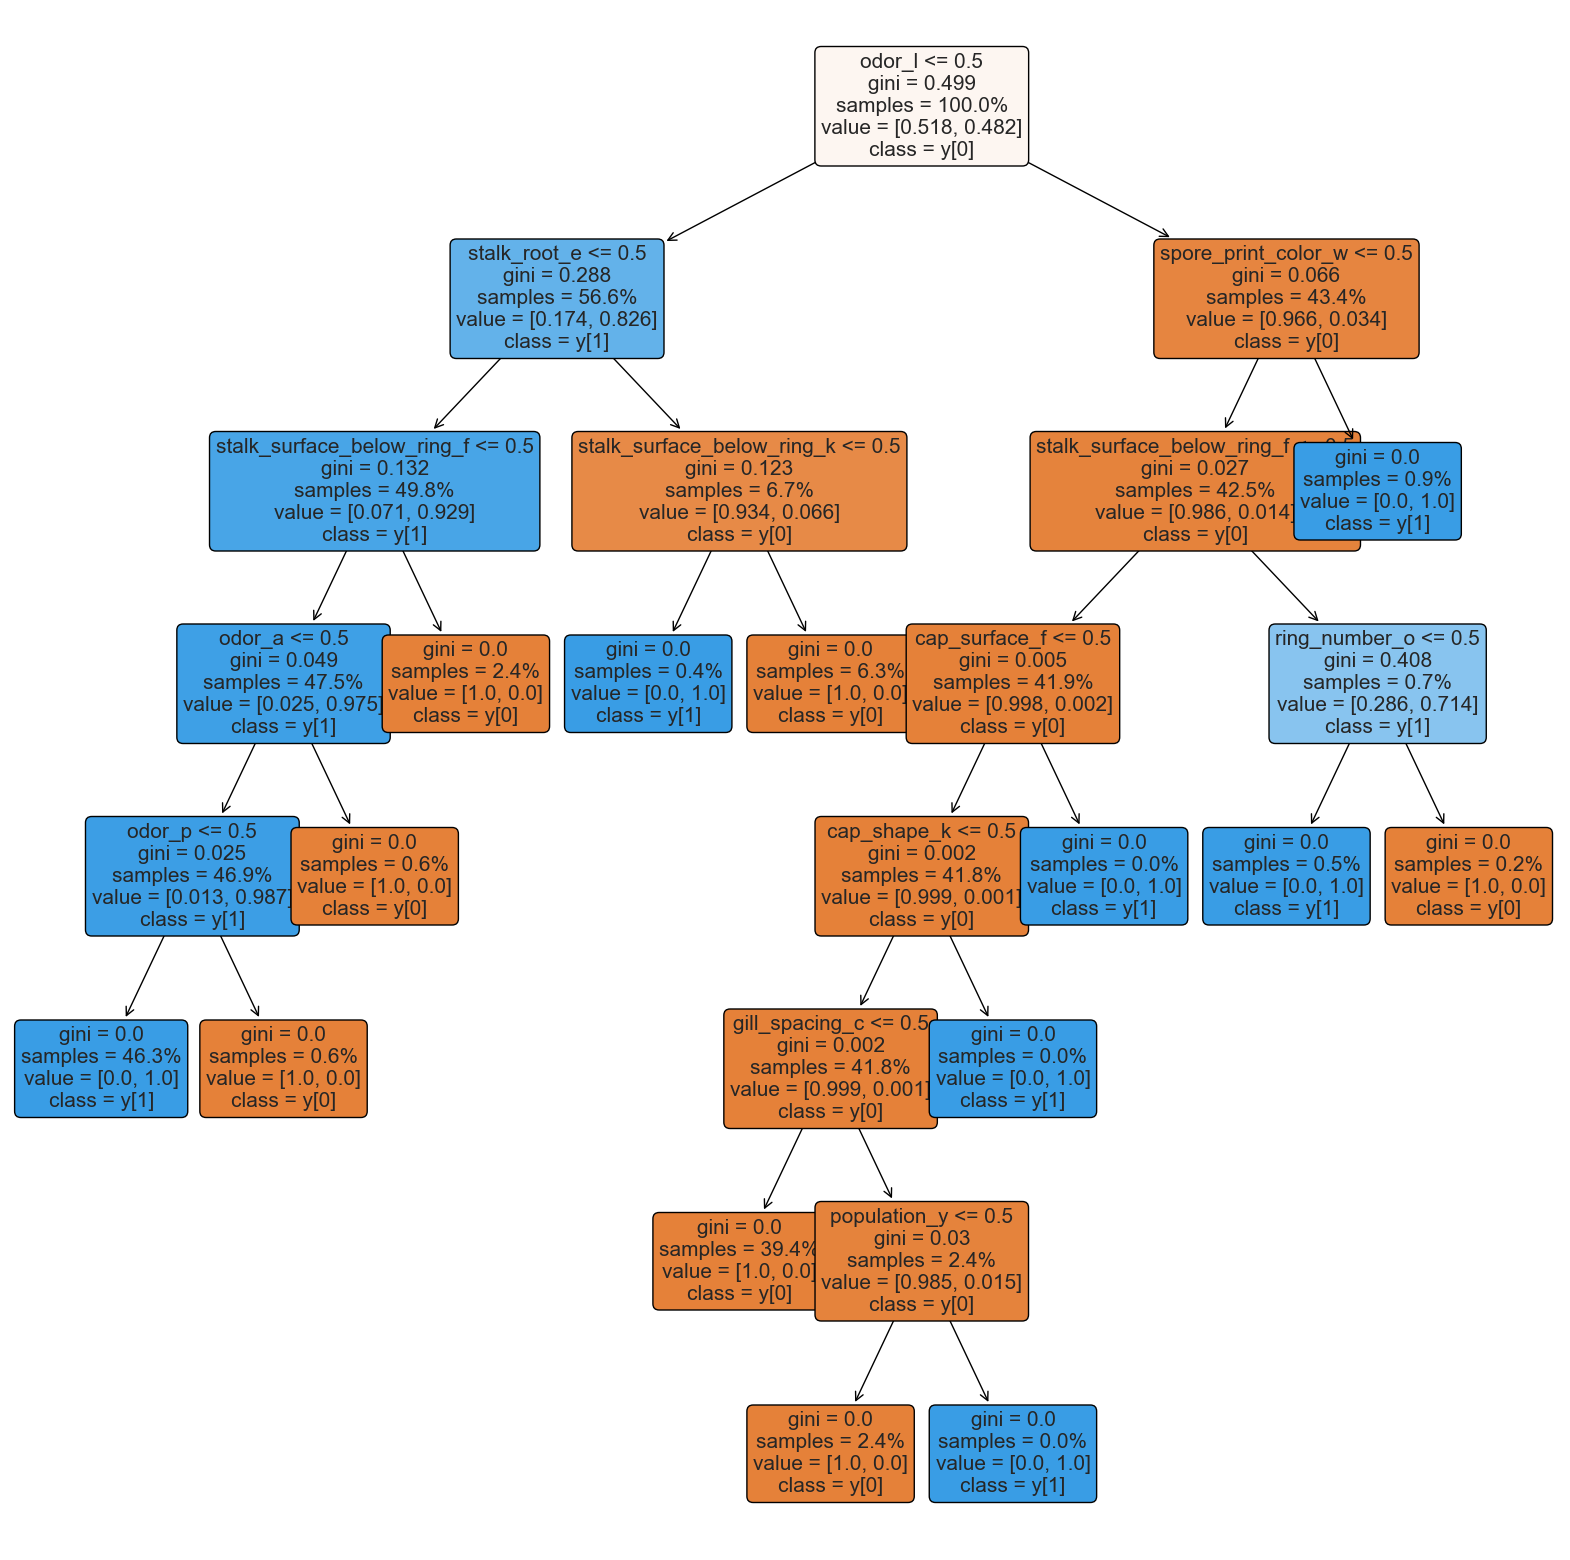

27-element Array{PyCall.PyObject,1}:
 PyObject Text(911.7647058823529, 1443.75, 'odor_l <= 0.5\ngini = 0.499\nsamples = 100.0%\nvalue = [0.518, 0.482]\nclass = y[0]')                    
 PyObject Text(547.0588235294117, 1251.25, 'stalk_root_e <= 0.5\ngini = 0.288\nsamples = 56.6%\nvalue = [0.174, 0.826]\nclass = y[1]')               
 PyObject Text(364.70588235294116, 1058.75, 'stalk_surface_below_ring_f <= 0.5\ngini = 0.132\nsamples = 49.8%\nvalue = [0.071, 0.929]\nclass = y[1]')
 PyObject Text(273.52941176470586, 866.25, 'odor_a <= 0.5\ngini = 0.049\nsamples = 47.5%\nvalue = [0.025, 0.975]\nclass = y[1]')                     
 PyObject Text(182.35294117647058, 673.75, 'odor_p <= 0.5\ngini = 0.025\nsamples = 46.9%\nvalue = [0.013, 0.987]\nclass = y[1]')                     
 PyObject Text(91.17647058823529, 481.25, 'gini = 0.0\nsamples = 46.3%\nvalue = [0.0, 1.0]\nclass = y[1]')                                           
 PyObject Text(273.52941176470586, 481.25, 'gini = 0.0\nsamples

In [80]:
#need to increase the size of the figure so that it is legible 
fig, ax = subplots(figsize=(20,20))

#feature_names = puts a label of the attribute that is being questioned in that cell instead of a number 
#class_names = gives the prodominant class in that group (1: poisinous, 0:edible)
#filled = true means that it will color the box based on the prodominant class (blue=poisinous, orange=edible)
#proportion=true reports the values and samples as percentage of the group with that label instead of the actual number of species with that label 
#rounded=true and fontsize are simply a formating thing to make it look nicer and more legible 
plot_tree(mushroom_model, feature_names=attributes, class_names=true, filled=true, proportion=true,
    rounded=true, fontsize=15)
